# Proyek Analisis Data: Bike Sharing Dataset

### 1.Menentukan Pertanyaan bisnis

1.) Bagaimana perbandingan jumlah pengguna penyewaan sepeda yang registered dan casual?

2.)Apakah ada korelasi antara kondisi tempratur suhu dengan jumlah pengguna penyewaan sepeda?

3.)Pada musim apa terdapat total penyewaan sepeda paling tinggi?

4.)Bagaimanan pola penyewaan sepeda berdasarkan hari dalam seminggu?

5.)Bagaimanan pola penyewaan sepeda berdasarkan jam dalam sehari?

6.)Bagaimana efek cuaca terhadap jumlah total penyewaan sepeda?

7.) Bagaimana prediksi jumlah penyewa sepeda setiap jam atau harian berdasarkan lingkungan dan musim?

## 2.Menyiapkan semua library yang dibuthkan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## 3.**Data Wrangling**

### 3.1Gathering Data

#### Data Day

In [ ]:
day_df = pd.read_csv("https://raw.githubusercontent.com/bangbrayens/submission-data-analysis/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Data Hour

In [ ]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/bangbrayens/submission-data-analysis/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### 3.2Assesing Data


#### Melihat Tipe Data


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Beberapa yang harus diperbaiki :**


1.   Beberapa nama kolom sulit dibaca dan dimengerti (dteday >date day, yr > year, mnth > month, weathersit > weather, cnt > count
2.   Tipe data dteday diganti menjadi date time karena merupakan type data waktu
3.   Kolom season dan weathersit masih bilangan bulat, ubah menjadi string untuk pemahaman yang lebih baik.
season (1:springer, 2:summer, 3:fall, 4:winter)
weathersit :
1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few

4. Nilai yr, month, dan weekday juga dalam format bilangan bulat, ubah nilainya menjadi datetime dan waktu sebenarnya
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)

#### Melihat Missing Value

In [ ]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64



*  Tidak ada missing value pada dataset


#### Melihat seluruh statistk data

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### 3.3Cleaning Data

### day


#### Memperbaiki beberapa nama kolom

In [ ]:
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
    },
    inplace=True,
)
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengganti tipe data pada kolom dteday

In [ ]:

day_df["dateday"] = pd.to_datetime(day_df["dateday"])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dateday     731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weather     731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  count       731 non-null    int64         
dtypes: datetime64[ns](1), floa

#### Mengubah nilai kolom *season* dan *weather*

In [ ]:
day_df["season"]=day_df["season"].map({
    1:"Springer",
    2:"Summer",
    3:"Fall",
    4:"Winter",
})

day_df["weather"]=day_df["weather"].map({
    1: "Clear",
    2: "Cloudy",
    3: "Light Rain",
    4: "Heavy Rain",
})
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,0,1,0,6,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,0,1,0,0,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,0,1,0,1,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,0,1,0,2,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,0,1,0,3,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Mengubah nilai pada kolom *weekday, month,* dan *year*

In [ ]:
day_df["weekday"] = day_df["dateday"].dt.day_name()
day_df["month"] = day_df["dateday"].dt.month_name()
day_df["year"] = day_df["dateday"].dt.year
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Menormalisasi nilai pada kolom *temp, atemp, hum,* dan *windspeed*

In [ ]:
day_df["temp"] = day_df["temp"]*41
day_df["atemp"] = day_df["atemp"]*50
day_df["hum"] = day_df["hum"]*100
day_df["windspeed"] = day_df["windspeed"]*67
day_df.head()

,instant,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,Springer,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,Springer,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,Springer,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,Springer,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Menghapus kolom yang tidak relevan

In [ ]:
day_df.drop(labels="instant", axis=1, inplace=True)
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Springer,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2011-01-02,Springer,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2011-01-03,Springer,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2011-01-04,Springer,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2011-01-05,Springer,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    object        
 2   year        731 non-null    int64         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    object        
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(4)
memory usage: 85.8+ 

#### Mengexport dataset yang sudah dibersihkan

In [ ]:
day_df.to_csv("main_dataday.CSV", index=False)

### Hour

#### memberbaiki nama kolom

In [ ]:
hour_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "weathersit": "weather",
        "cnt": "count",
        "hr": "hour",
    },
    inplace=True,
)
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Mengganti tipe data pada kolom dateday

In [ ]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dateday     17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   year        17379 non-null  int64         
 4   month       17379 non-null  int64         
 5   hour        17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weather     17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  count       17379 non-

#### mengubah nilai wither dan season

In [ ]:
hour_df["season"]=hour_df["season"].map({
    1:"Springer",
    2:"Summer",
    3:"Fall",
    4:"Winter",
})

hour_df["weather"]=hour_df["weather"].map({
    1: "Clear",
    2: "Cloudy",
    3: "Light Rain",
    4: "Heavy Rain",
})
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,0,1,0,0,6,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### mengubah nilai pada kolom weekday, month, dan year

In [ ]:
hour_df["weekday"] = hour_df["dateday"].dt.day_name()
hour_df["month"] = hour_df["dateday"].dt.month_name()
hour_df["year"] = hour_df["dateday"].dt.year
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


#### menormalisasikan nilai pada kolom te,p, atemp. hum, dan windspeed

In [ ]:
hour_df["temp"] = hour_df["temp"]*41
hour_df["atemp"] = hour_df["atemp"]*50
hour_df["hum"] = hour_df["hum"]*100
hour_df["windspeed"] = hour_df["windspeed"]*67
hour_df.head()

,instant,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Springer,2011,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Springer,2011,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Springer,2011,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Springer,2011,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Springer,2011,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


#### menghapus kolom yang tidak diperlukan


In [ ]:
hour_df.drop(labels="instant", axis=1, inplace=True)
hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,2011-01-01,Springer,2011,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01,Springer,2011,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01,Springer,2011,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01,Springer,2011,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01,Springer,2011,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


#### mengeksport dataset yang sudah dibersihkan


In [ ]:
hour_df.to_csv("main_datahour.CSV", index=False)

### 4.**Explaratory Data Analysis (EDA)**

#### 4.1 Mengecek Seluruh Statistik Data yang sudah dibersihkan

In [ ]:
day_df.describe(include="all")

<ipython-input-81-51e59b52191b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
count,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,731,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2011-01-01 00:00:00,Fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
std,NaN,NaN,0.500342,NaN,0.167155,NaN,0.465233,NaN,7.505091,8.148059,14.242910,5.192357,686.622488,1560.256377,1937.211452
min,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,NaN,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000


Tidak anomali pada dataset yang sudah dibersihkan

#### 4.2 Penyewa Sepeda Berdasarkan Jenis Tipe Penggunanya

In [ ]:
day_df[["casual", "registered"]]. describe().style.format("{:.0f}")

,casual,registered
count,731,731
mean,848,3656
std,687,1560
min,2,20
25%,316,2497
50%,713,3662
75%,1096,4776
max,3410,6946


In [ ]:
users_by_type=day_df[["casual", "registered"]].sum()
users_by_type

casual         620017
registered    2672662
dtype: int64

Dapat dilihat berdasarkan data bahwa penyewa sepeda registered lebih banyak 4x lebih banyak dari pada penyewa casual

#### 4.2 Penyewa Sepeda Berdasarkan Musim

In [ ]:
users_by_season = day_df.groupby(by="season").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum",
})
users_by_season.style.format("{:.0f}")
users_by_season.sort_values(by=("count"), ascending=False)

,casual,registered,count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Springer,60622,410726,471348


Dapat dilihat penyewa tertinggi pada musim gugur (fall) dan terendah pada musim semi (springer)

#### 4.4 Penyewa Sepeda Berdasarkan Tahun

In [ ]:
users_by_year = day_df.groupby(by="year").agg({
     "casual" : "sum",
    "registered" : "sum",
    "count" : "sum",
})
users_by_year.style.format("{:.0f}")

,casual,registered,count
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


Dapat dilihat bahwa adanya peningkatan penyewa sepeda secara signifikan dari tahun 2011 hingga tahun 2012

#### 4.5 Penyewa sepeda berdasarkan bulan

In [ ]:
user_by_month = day_df.groupby(by="month").agg({
    "casual" : "sum",
    "registered" : "sum",
    "count" : "sum",
})
user_by_month.style.format("{:0f}")
user_by_month.sort_values(by=("count"), ascending=False)

,casual,registered,count
month,,,
August,72039,279155,351194
June,73906,272436,346342
September,70323,275668,345991
July,78157,266791,344948
May,75285,256401,331686
October,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
March,44444,184476,228920


Dapat dilihat penyewa tertinggi pada bulan Agustus dan Penyewa terendah pada bulan januari


#### 4.6 Penyewaan sepeda berdasarkan hari

In [ ]:
users_by_weekday = day_df.groupby(by="weekday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weekday.style.format("{:.0f}")
users_by_weekday.sort_values(by=("count"), ascending=False)

,casual,registered,count
weekday,,,
Friday,78238,409552,487790
Thursday,61460,423935,485395
Saturday,153852,323955,477807
Wednesday,57319,415729,473048
Tuesday,57843,411266,469109
Monday,70784,384719,455503
Sunday,140521,303506,444027


In [ ]:
users_by_holiday = day_df.groupby(by="holiday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_holiday.style.format("{:.0f}")

,casual,registered,count
holiday,,,
0,597658,2616586,3214244
1,22359,56076,78435


In [ ]:

users_by_workingday = day_df.groupby(by="workingday").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_workingday.style.format("{:.0f}")

,casual,registered,count
workingday,,,
0,316732,683537,1000269
1,303285,1989125,2292410




1.   Dapat dilihat bahwa penyewa sepeda paling tinggi terdapat pada hari Jum'at.
2.  Penyewa sepeda mengalami penurunan yang signifikan pada akhir pekan, terutama hari libur. Namun terdapat pengecualian bagi pengguna penyewa sepeda yang casual, karena jumlahnya cukup tinggi pada akhir pekan




#### Penyewaan berdasarkan jam

In [ ]:
users_by_hour = hour_df.groupby(by="hour").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_hour.style.format("{:.0f}")
users_by_hour.sort_values(by=("count"), ascending=False)

,casual,registered,count
hour,,,
17,54220,282640,336860
18,44496,265276,309772
8,15761,245240,261001
16,53834,173914,227748
19,35505,191284,226789
13,52713,132206,184919
12,49718,134696,184414
15,54606,128543,183149
14,55089,120563,175652


#### 4.7 Penyewa Sepeda Berdasarkan Cuaca

In [ ]:
users_by_weather = day_df.groupby(by="weather").agg(
    {
        "casual": "sum",
        "registered": "sum",
        "count": "sum",
    }
)

users_by_weather.style.format("{:.0f}")
users_by_weather.sort_values(by=("count"), ascending=False)

,casual,registered,count
weather,,,
Clear,446346,1811606,2257952
Cloudy,169776,827082,996858
Light Rain,3895,33974,37869


Dapat dilihat bahwa penyewa sepeda sangat tinggi pada saat cuaca cerah, namun sangat rendah pada saat hujan

#### 4.8 Korelasi antara jumlah (count) penyewaan sepeda dengan temp, atemp, hum, dan windspeed

In [ ]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
day_df[selected_columns].corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000




1.   Dapat diketahui bahwa jumlah penyewaan sepeda memiliki korelasi positif (moderate) dengan temp, atemp, hum, dan windspeed.
2.   Dapat diketahui juga terdapat sedikit korelasi negatif antara jumlah penyewaan sepeda dengan hum, windspeed.

Dari hubungan korelasi dapat diartikan jumlah penyewa sepeda meningkat seiring bertambahnya suhu dan berkurang seiring bertambahnya kelembapan dan kecepatan angin



#### 4.9 Correlation Heat Map

In [ ]:
day_df.corr(numeric_only=True)

,year,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,count
year,1.000000,0.007954,-0.002013,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
holiday,0.007954,1.000000,-0.253023,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
workingday,-0.002013,-0.253023,1.000000,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
temp,0.047604,-0.028556,0.052660,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,0.046106,-0.032507,0.052182,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,-0.110651,-0.015937,0.024327,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,-0.011817,0.006292,-0.018796,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,0.248546,0.054274,-0.518044,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,0.594248,-0.108745,0.303907,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
count,0.566710,-0.068348,0.061156,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000


<Axes: >

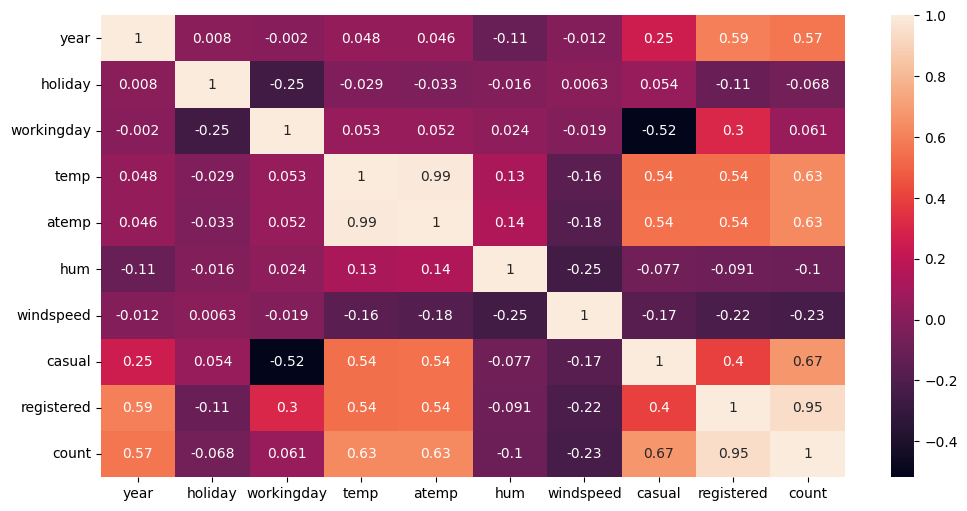

In [ ]:
plt.figure(figsize=(12, 6))


sns.heatmap(day_df.corr(numeric_only=True), annot=True)

4.10 menggabungkan day dan hour

In [ ]:
day_df.sample(5)

,dateday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
509,2012-05-24,Summer,2012,May,0,Thursday,1,Clear,26.855000,30.33500,71.6667,11.584032,1059,5711,6770
0,2011-01-01,Springer,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
49,2011-02-19,Springer,2011,February,0,Saturday,0,Clear,16.365847,19.57020,18.7917,34.000021,532,1103,1635
237,2011-08-26,Fall,2011,August,0,Friday,1,Clear,28.700000,32.98665,76.1250,5.625487,768,3893,4661
584,2012-08-07,Fall,2012,August,0,Tuesday,1,Cloudy,30.169153,34.88105,70.3750,7.832836,1278,5995,7273


### 5.Visualisasi Data

#### 5.1 pertanyaan 1 : Bagaimana perbandingan jumlah pengguna penyewaan sepeda yang registered dan casual?

In [ ]:
users_by_type = users_by_type.reset_index()
users_by_type = users_by_type.rename(columns={"index": "type", 0: "total"})

users_by_type

,type,total
0,casual,620017
1,registered,2672662


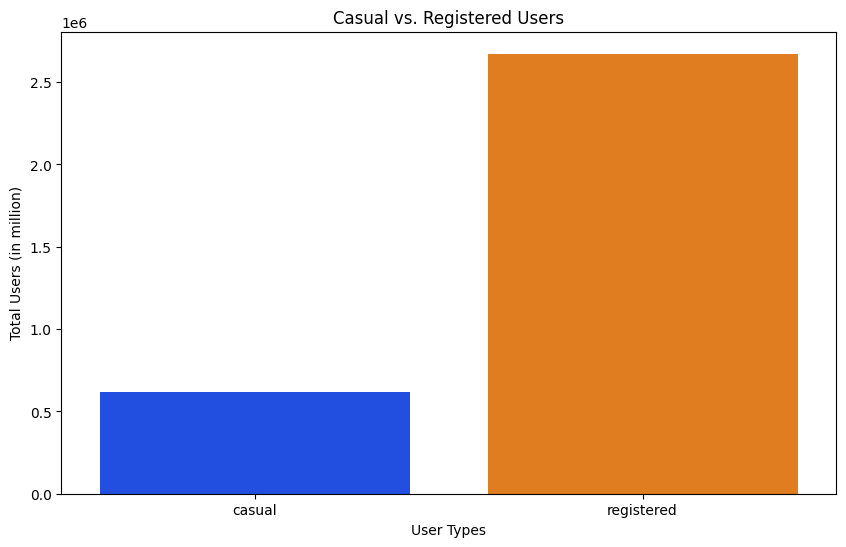

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="type",
    y="total",
    hue="type",
    data=users_by_type,
    palette="bright",
)
plt.title("Casual vs. Registered Users")
plt.xlabel("User Types")
plt.ylabel("Total Users (in million)")
plt.show()

Berdasarkan visualisasi di atas, terlihat bahwa perbandingan total pengguna penyewaan sepeda dengan pengguna registered jauh lebih tinggi dibandingkan dengan pengguna casual. Perbedaannya hampir 4x lebih tinggi selama 2 tahun terakhir.

#### 5.2 Pertanyaan 2 : Apakah ada korelasi antara kondisi tempratur suhu dengan jumlah pengguna penyewaan sepeda?

In [ ]:
selected_columns = ["count", "temp", "atemp", "hum", "windspeed"]
temp_count_etc = day_df[selected_columns]

temp_count_etc.corr(numeric_only=True)

,count,temp,atemp,hum,windspeed
count,1.000000,0.627494,0.631066,-0.100659,-0.234545
temp,0.627494,1.000000,0.991702,0.126963,-0.157944
atemp,0.631066,0.991702,1.000000,0.139988,-0.183643
hum,-0.100659,0.126963,0.139988,1.000000,-0.248489
windspeed,-0.234545,-0.157944,-0.183643,-0.248489,1.000000


<Axes: >

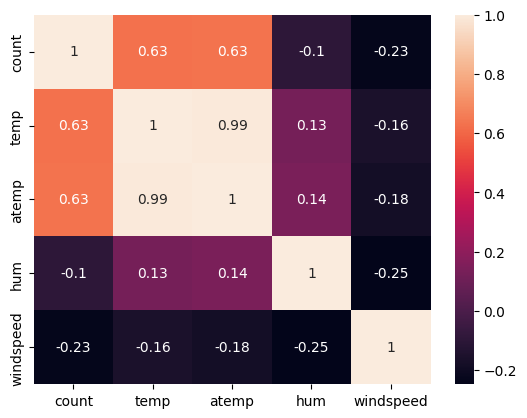

In [ ]:
sns.heatmap(temp_count_etc.corr(numeric_only=True), annot=True)

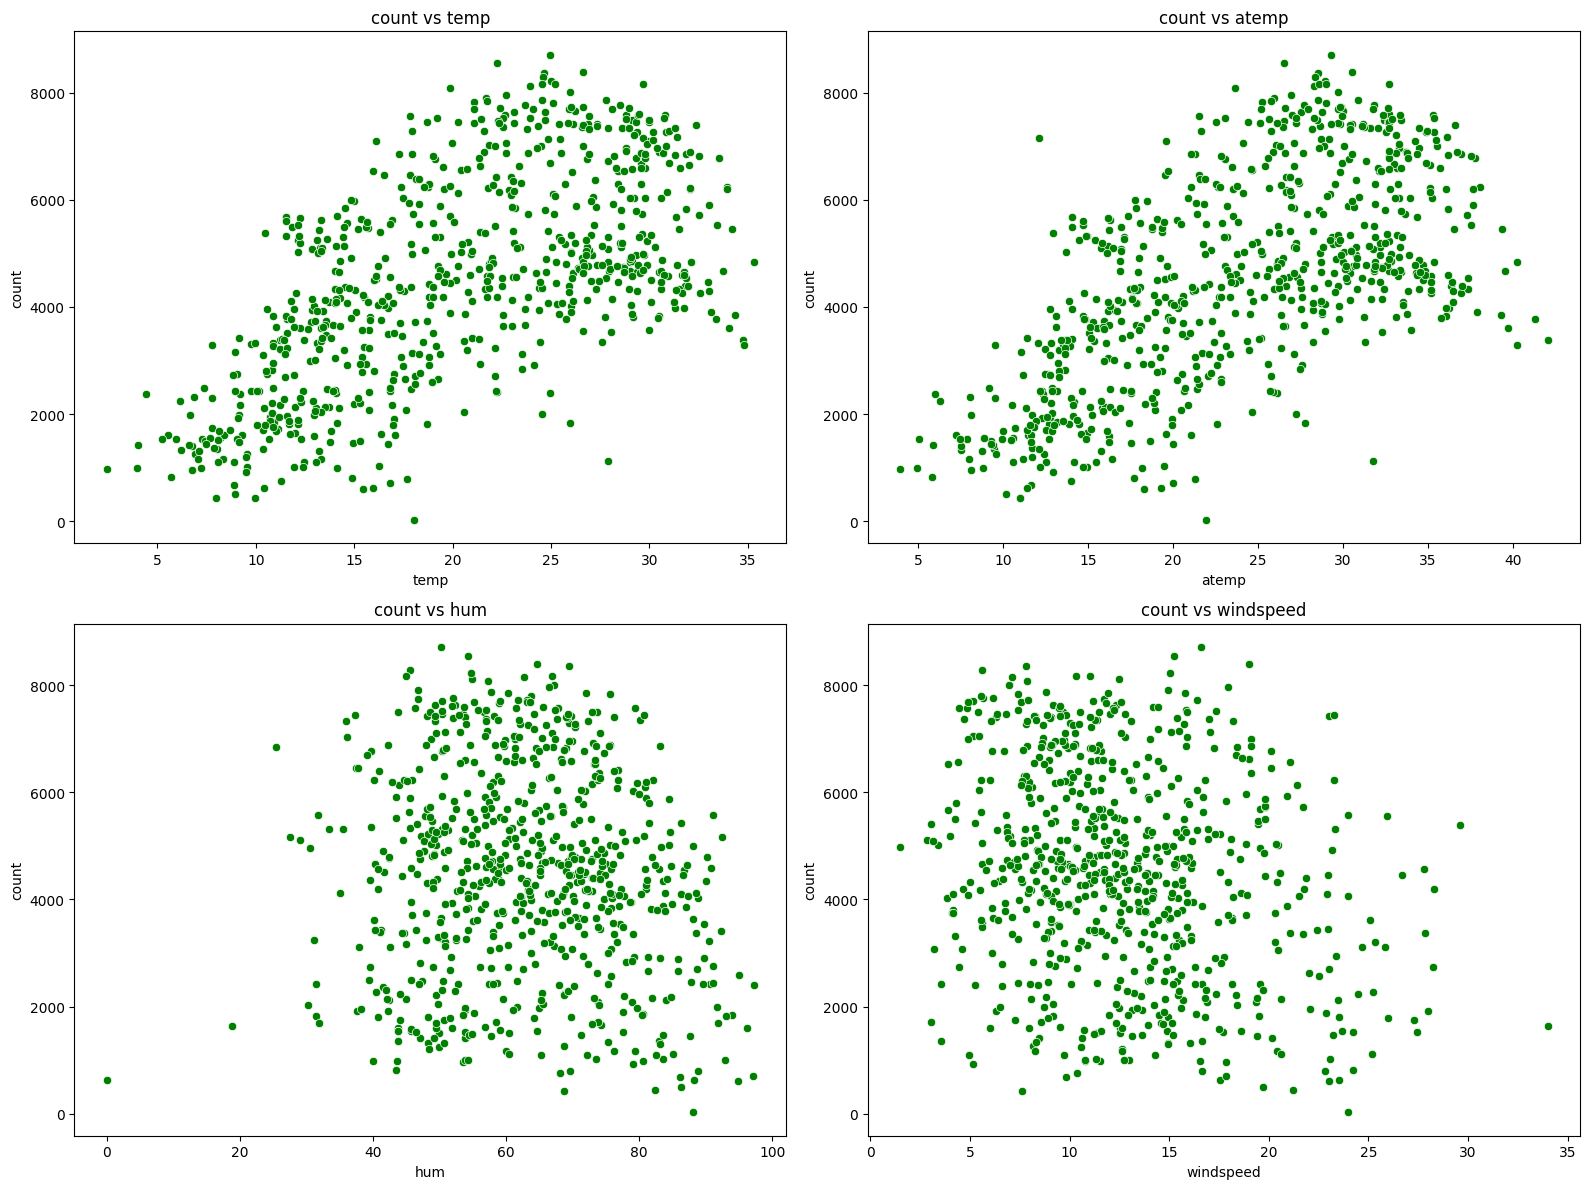

In [ ]:
selected_columns = ["temp", "atemp", "hum", "windspeed"]

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

for i, col in enumerate(selected_columns):
    sns.scatterplot(
        x=col,
        y="count",
        data=day_df,
        ax=axs[i // 2, i % 2],
        color="green",
    )
    axs[i // 2, i % 2].set_title(f"count vs {col}")

plt.tight_layout()
plt.show()

Berdasarkan observasi heatmap dan scatter plot:

Tampaknya jumlah pengguna penyewana sepeda memiliki positive moderate correlation dengan temp dan atemp. Hal ini berarti jumlah pengguna bike sharing meningkat seiring dengan meningkatnya suhu.
Sementara itu, terdapat sedikit korelasi negatif antara hum dan windspeed dengan count.

#### 5.3 Pertanyaan 3 : Pada musim apa terdapat total penyewaan sepeda paling tinggi?

In [ ]:
users_by_season = users_by_season.sort_values(by="count", ascending=False)
users_by_season = users_by_season.reset_index()

users_by_season


,season,casual,registered,count
0,Fall,226091,835038,1061129
1,Summer,203522,715067,918589
2,Winter,129782,711831,841613
3,Springer,60622,410726,471348


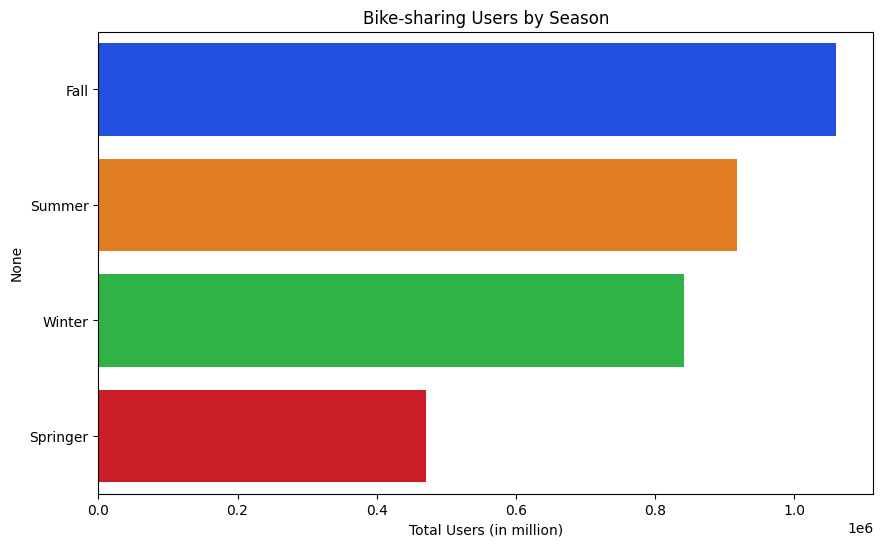

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="count",
    y="season",
    hue="season",
    data=users_by_season,
    palette="bright",
)
plt.title("Bike-sharing Users by Season")
plt.xlabel("Total Users (in million)")
plt.ylabel("None")
plt.show()

In [ ]:
users_by_season_unpivoted = pd.melt(
    users_by_season,
    id_vars=["season"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_season_unpivoted


,season,type,value
0,Fall,casual,226091
1,Summer,casual,203522
2,Winter,casual,129782
3,Springer,casual,60622
4,Fall,registered,835038
5,Summer,registered,715067
6,Winter,registered,711831
7,Springer,registered,410726


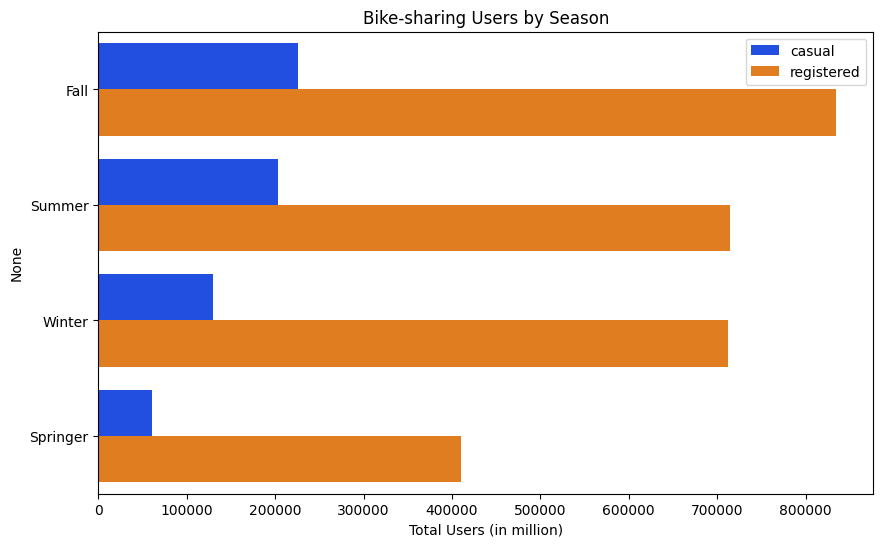

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="value",
    y="season",
    hue="type",
    data=users_by_season_unpivoted,
    palette="bright",
)
plt.title("Bike-sharing Users by Season")
plt.xlabel("Total Users (in million)")
plt.ylabel("None")
plt.legend()
plt.show()



1.   Penyewaan sepeda tertinggi terlihat pada musim gugur, diikuti oleh musim panas dan musim dingin, dengan penggunaan terendah pada musim semi.
2.  Saat mempertimbangkan tipe/jenis pengguna, tidak ada perbedaan yang signifikan. Semua musim mengikuti pola serupa dalam jumlah total penggunanya.



#### 5.4 Pertanyaan 4 : Bagaimanan pola penyewaan sepeda berdasarkan hari dalam seminggu?

In [ ]:
users_by_weekday = users_by_weekday.reset_index()

users_by_weekday

,weekday,casual,registered,count
0,Friday,78238,409552,487790
1,Monday,70784,384719,455503
2,Saturday,153852,323955,477807
3,Sunday,140521,303506,444027
4,Thursday,61460,423935,485395
5,Tuesday,57843,411266,469109
6,Wednesday,57319,415729,473048


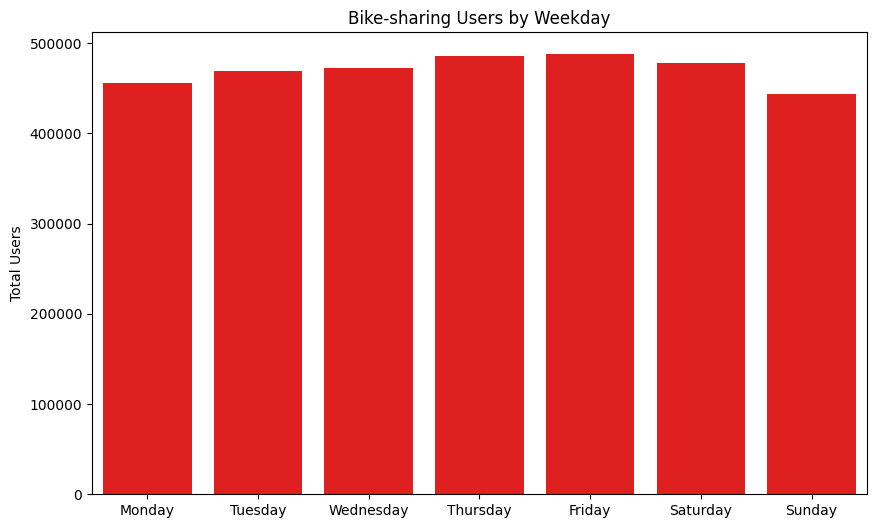

In [ ]:
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]

plt.figure(figsize=(10, 6))

sns.barplot(
    x="weekday",
    y="count",
    data=users_by_weekday,
    order=day_order,
    color="red",
)
plt.title("Bike-sharing Users by Weekday")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.show()

In [ ]:
users_by_weekday_unpivoted = pd.melt(
    users_by_weekday,
    id_vars=["weekday"],
    value_vars=["casual", "registered"],
    var_name="type",
)

users_by_weekday_unpivoted

,weekday,type,value
0,Friday,casual,78238
1,Monday,casual,70784
2,Saturday,casual,153852
3,Sunday,casual,140521
4,Thursday,casual,61460
5,Tuesday,casual,57843
6,Wednesday,casual,57319
7,Friday,registered,409552
8,Monday,registered,384719
9,Saturday,registered,323955


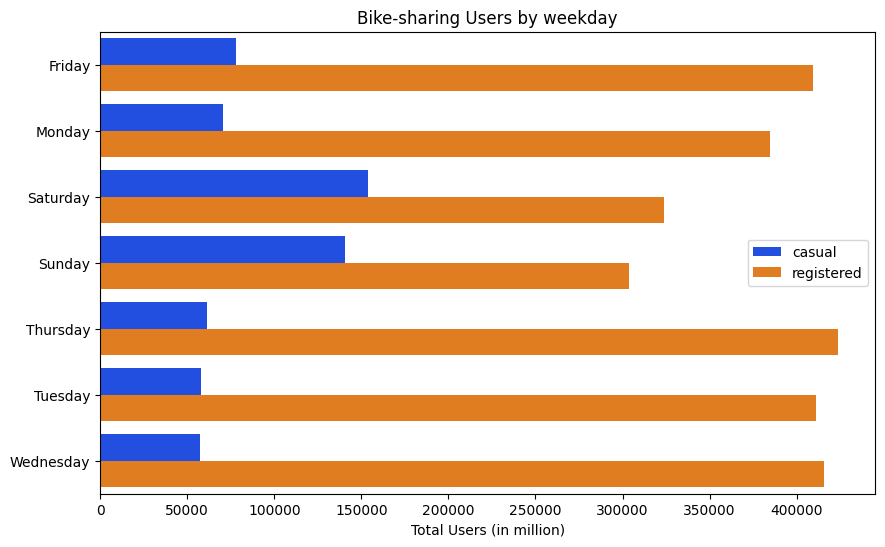

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="value",
    y="weekday",
    hue="type",
    data=users_by_weekday_unpivoted,
    palette="bright",
)
plt.title("Bike-sharing Users by weekday")
plt.xlabel("Total Users (in million)")
plt.ylabel(None)
plt.legend()
plt.show()

In [ ]:
users_by_workingday = users_by_workingday.reset_index()

users_by_workingday

,workingday,casual,registered,count
0,0,316732,683537,1000269
1,1,303285,1989125,2292410


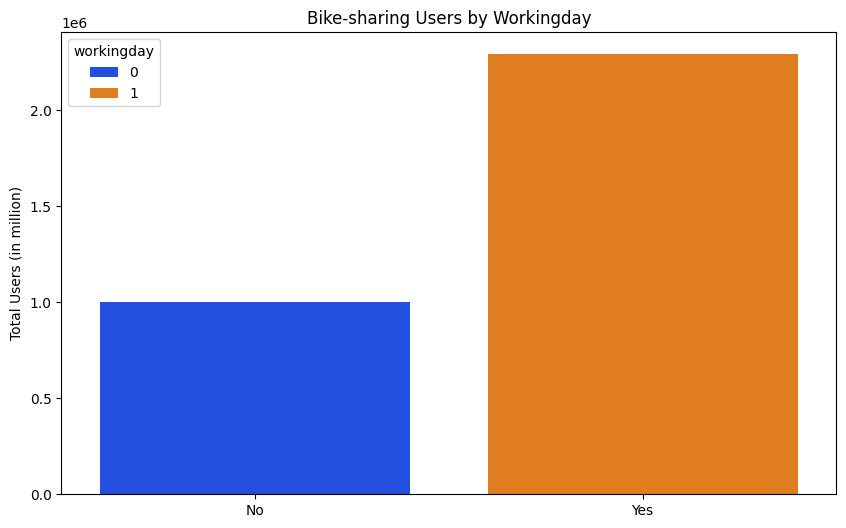

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="workingday",
    y="count",
    hue="workingday",
    data=users_by_workingday,
    palette="bright",
)
plt.title("Bike-sharing Users by Workingday")
plt.xlabel(None)
plt.ylabel("Total Users (in million)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

In [ ]:
users_by_holiday = users_by_holiday.reset_index()

users_by_holiday

,holiday,casual,registered,count
0,0,597658,2616586,3214244
1,1,22359,56076,78435


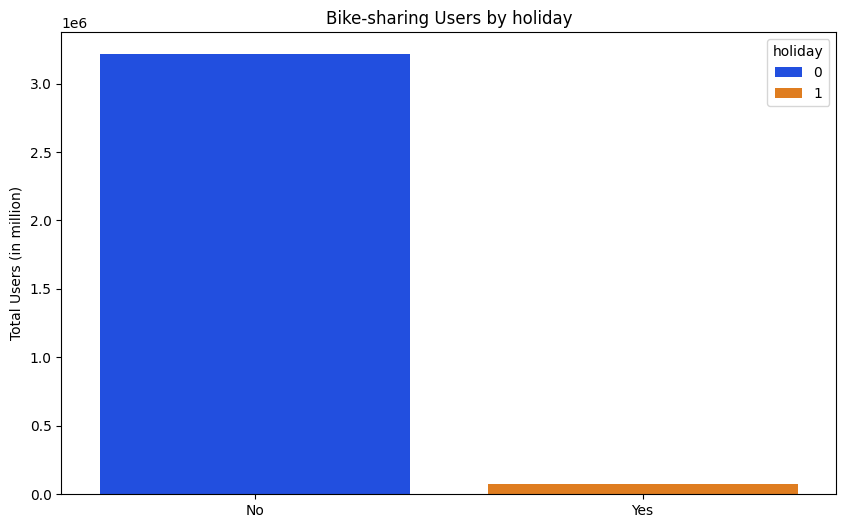

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="holiday",
    y="count",
    hue="holiday",
    data=users_by_holiday,
    palette="bright",
)
plt.title("Bike-sharing Users by holiday")
plt.xlabel(None)
plt.ylabel("Total Users (in million)")
plt.xticks(ticks=[0, 1], labels=["No", "Yes"])
plt.show()

1. Visualisasi pengguna penyewaan sepeda berdasarkan weekday menunjukkan nilai konstan setiap harinya.
2. Namun, jika dilihat berdasarkan jenis pengguna, pengguna registered cenderung lebih tinggi pada weekdays, sedangkan pengguna casual cenderung lebih tinggi pada akhir pekan.
3. Hal ini didukung oleh visualisasi pengguna penyewaan sepeda berdasarkan workingday yang menunjukkan bahwa pada hari kerja, jumlah penggunanya jauh lebih tinggi.
4. Sedangkan pada holiday, pengguna penyewaan sepeda mengalami penurunan drastis.

#### 5.5 Pertanyaan 5 : Bagaimanan pola penyewaan sepeda berdasarkan jam dalam sehari?

In [ ]:
users_by_hour = users_by_hour.reset_index()

users_by_hour

,hour,casual,registered,count
0,0,7375,31755,39130
1,1,4709,19455,24164
2,2,3412,12940,16352
3,3,1893,6281,8174
4,4,874,3554,4428
5,5,1012,13249,14261
6,6,3017,52115,55132
7,7,8037,146134,154171
8,8,15761,245240,261001
9,9,22458,136980,159438


<ipython-input-115-21412764a802>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


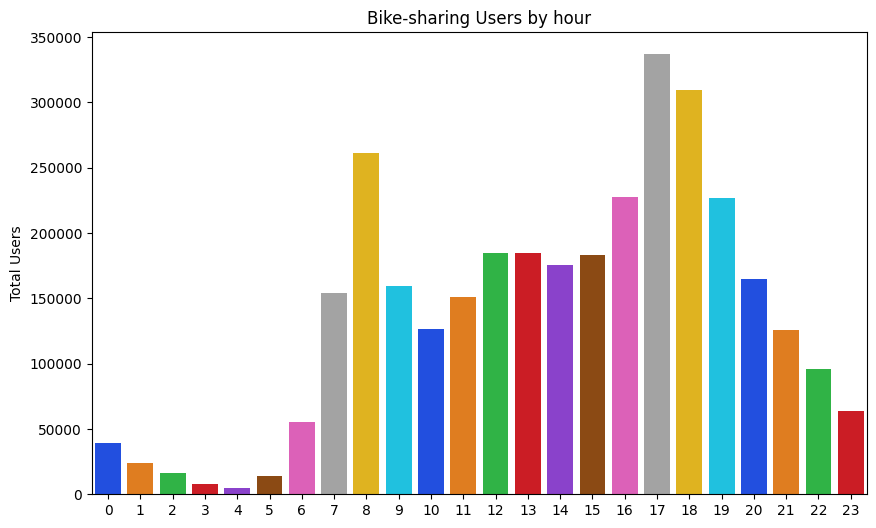

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="hour",
    y="count",
    data=users_by_hour,
    palette = "bright"
)
plt.title("Bike-sharing Users by hour")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.show()

Pertanyaan 6 :Bagaimana efek cuaca terhadap jumlah total penyewaan sepeda?

In [ ]:
users_by_weather = users_by_weather.reset_index()

users_by_weather

,weather,casual,registered,count
0,Clear,446346,1811606,2257952
1,Cloudy,169776,827082,996858
2,Light Rain,3895,33974,37869


<ipython-input-117-bb5318a820d2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


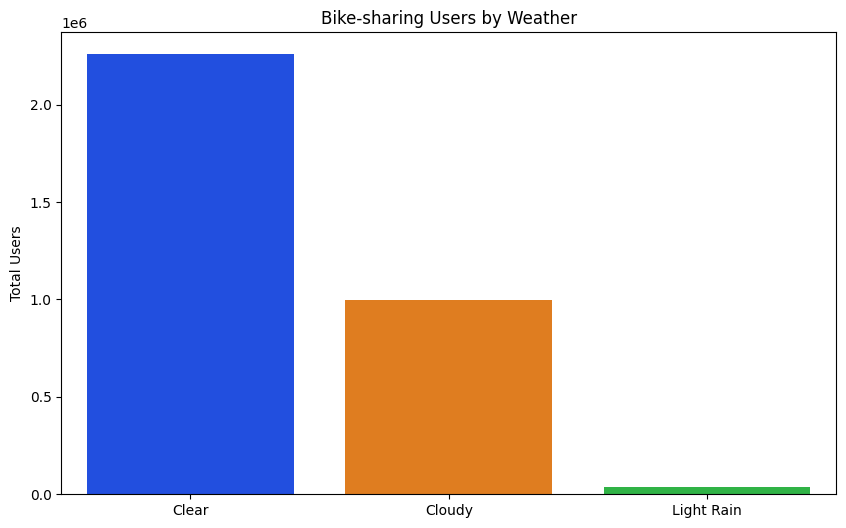

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(
    x="weather",
    y="count",
    data=users_by_weather,
    palette = "bright"
)
plt.title("Bike-sharing Users by Weather")
plt.xlabel(None)
plt.ylabel("Total Users")
plt.show()

Pertanyaan 7 : Bagaimana prediksi jumlah penyewa sepeda setiap jam atau harian berdasarkan lingkungan dan musim?